# Assignment 1
*     Research: trace how two neighbouring countires - Belarus and Poland developed their main economic indicator -- GPD -- in relation to the development of democracy in same countries in XX century.
*     Databases: VDem, Eurostat, World Bank


step 1: Filter VDem data (stored locally) of electoral and liberal democracies indexes for Poland and Belarus and export to repo; Filter historical GDP stat

In [18]:
import pandas as pd

# importing the data
df = pd.read_csv('/Users/Ksardas/Documents/Vdem/V-Dem-CY-Full+Others-v15.csv', low_memory=False)

# filter for Poland (17) and BY (107)
filtered_df = df[df['country_id'].isin([107, 17])]

# Filter for v2x_polyarchy and v2x_libdem tags and years >= 1945
filtered_df = filtered_df[['country_id', 'year', 'v2x_polyarchy', 'v2x_libdem']]
filtered_df = filtered_df[filtered_df['year'] >= 1945]

# If 1945 is missing, include the closest available year <-- added just in case
if 1945 not in filtered_df['year'].values:
    closest_year = filtered_df['year'].min()
    filtered_df = filtered_df[filtered_df['year'] == closest_year]


# export to csv
filtered_df.to_csv('../../../data/raw/vdem_poland_by2.csv', index=False)

print("done")

done


In [31]:
# for historical GDP data I use the Maddison Project Database 2023. This dataset incorporates data on GDP per capita and population for 169 countries and aggregate regions from 1 AD up to 2022.
import pandas as pd
# have to use another panda bc its excel and define the sheet name from which to import
df = pd.read_excel('/Users/Ksardas/Documents/mpd2023_web.xlsx', sheet_name='Full data', engine='openpyxl')
#print(df.columns) <- used this to find out the names of the columns

# Filter for Belarus (BLR) and Poland (POL)
filtered_df = df[df['countrycode'].isin(['BLR', 'POL'])]

# Find the first year where 'gdppc' is a number for BLR
first_valid_year = filtered_df[(filtered_df['countrycode'] == 'BLR') & (filtered_df['gdppc'].notna())]['year'].min()

# Filter data starting from the first valid year for BLR
filtered_df = filtered_df[(filtered_df['year'] >= first_valid_year) | (filtered_df['countrycode'] == 'POL')]

# drop the 'pop' column
filtered_df = filtered_df.drop(columns=['pop', 'region', 'countrycode'])

filtered_df.to_csv('../../../data/raw/mad_poland_by.csv', index=False)

print("done")

# /Users/Ksardas/Documents/mpd2023_web.xlsx <- just not to forget where the file is

done


Preview what we got

In [32]:
import pandas as pd

vdem_data = pd.read_csv('../../../data/raw/vdem_poland_by2.csv')
print(vdem_data.head(3))

gdp_data = pd.read_csv('../../../data/raw/mad_poland_by.csv')
print(gdp_data.head(3))

   country_id  year  v2x_polyarchy  v2x_libdem
0          17  1945          0.160       0.104
1          17  1946          0.164       0.104
2          17  1947          0.180       0.108
   country  year   gdppc
0  Belarus  1973  8341.0
1  Belarus  1974     NaN
2  Belarus  1975     NaN


Change the column names to be the same

In [ ]:
import pandas as pd

#load data
vdem_data = pd.read_csv('../../../data/raw/vdem_poland_by2.csv')

#input naming
country_naming = {17: 'Poland', 107: 'Belarus'}
vdem_data['country'] = vdem_data['country_id'].map(country_naming)

#delete not needed column
vdem_data = vdem_data.drop(columns=['country_id'])

#save
vdem_data.to_csv('../../../data/raw/vdem_poland_by2.csv', index=False)

print("done")

In [37]:
#preview just in case
import pandas as pd

vdem_data = pd.read_csv('../../../data/raw/vdem_poland_by2.csv')
print(vdem_data.head(3))

gdp_data = pd.read_csv('../../../data/raw/mad_poland_by.csv')
print(gdp_data.head(3))

   year  v2x_polyarchy  v2x_libdem country
0  1945          0.160       0.104  Poland
1  1946          0.164       0.104  Poland
2  1947          0.180       0.108  Poland
   country  year   gdppc
0  Belarus  1973  8341.0
1  Belarus  1974     NaN
2  Belarus  1975     NaN


okay now we can index

In [ ]:
#set the index
vdem_data = vdem_data.set_index(['country', 'year', 'v2x_polyarchy', 'v2x_libdem'])
print(vdem_data.head(3))
#print was a bad idea
gdp_data = gdp_data.set_index(['country', 'year', 'gdppc'])
print(gdp_data.head(3))

In [44]:
vdem_data.tail(3)
#check

Empty DataFrame
Columns: []
Index: [(Belarus, 2022, 0.172, 0.037), (Belarus, 2023, 0.157, 0.035), (Belarus, 2024, 0.161, 0.036)]

now we can merge

In [46]:
import pandas as pd

#load
vdem_data = pd.read_csv('../../../data/raw/vdem_poland_by2.csv')
gdp_data = pd.read_csv('../../../data/raw/mad_poland_by.csv')

merged_data = pd.merge(vdem_data, gdp_data, on=['country', 'year'], how='inner')

#save
merged_data.to_csv('../../../data/clean/merged_poland_by.csv', index=False)

print("done")

done


In [52]:
merged_poland_by = pd.read_csv('../../../data/clean/merged_poland_by.csv')
merged_poland_by.tail(3)

,year,v2x_polyarchy,v2x_libdem,country,gdppc
108,2020,0.211,0.046,Belarus,19053.157021
109,2021,0.173,0.036,Belarus,19541.914363
110,2022,0.172,0.037,Belarus,18699.798237


Now maybe make a graph?

In [86]:
import pandas as pd
#we need to filter the data a bit
data = pd.read_csv('../../../data/clean/merged_poland_by.csv')
belarus_data = data[(data['country'] == 'Belarus') & (data['year'] >= 1990) & (data['year'] <= 2022)]
poland_data = data[(data['country'] == 'Poland') & (data['year'] >= 1990) & (data['year'] <= 2022)]

<Axes: xlabel='year', ylabel='gdppc'>

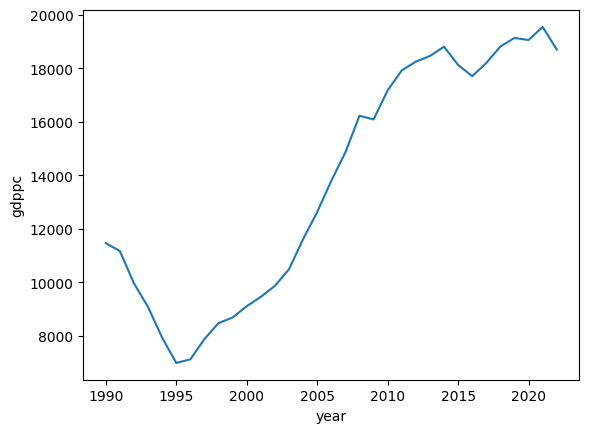

In [91]:
import seaborn as sns

sns.lineplot(
    data = belarus_data,
    x = 'year',
    y = 'gdppc',
)


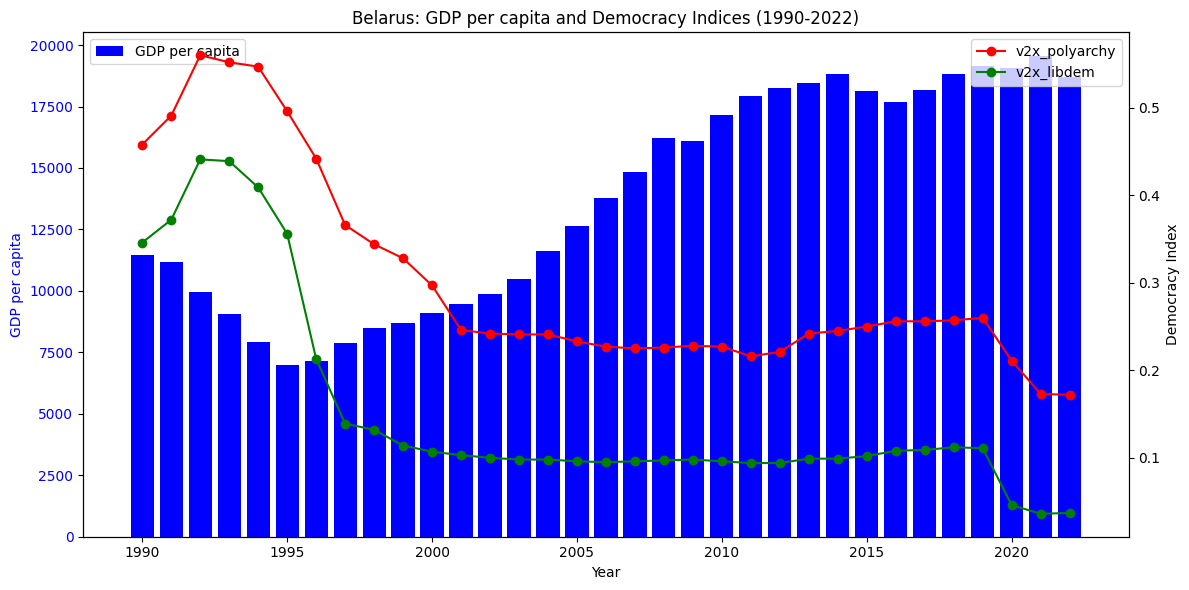

In [92]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

#gdppc
ax1.bar(belarus_data['year'], belarus_data['gdppc'], color='blue', label='GDP per capita')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#v2x_polyarchy and v2x_libdem
ax2 = ax1.twinx()
ax2.plot(belarus_data['year'], belarus_data['v2x_polyarchy'], color='red', label='v2x_polyarchy', marker='o')
ax2.plot(belarus_data['year'], belarus_data['v2x_libdem'], color='green', label='v2x_libdem', marker='o')
ax2.set_ylabel('Democracy Index', color='black')
ax2.tick_params(axis='y', labelcolor='black')

#legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('Belarus: GDP per capita and Democracy Indicators (1990-2022)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show
plt.tight_layout()
plt.show()

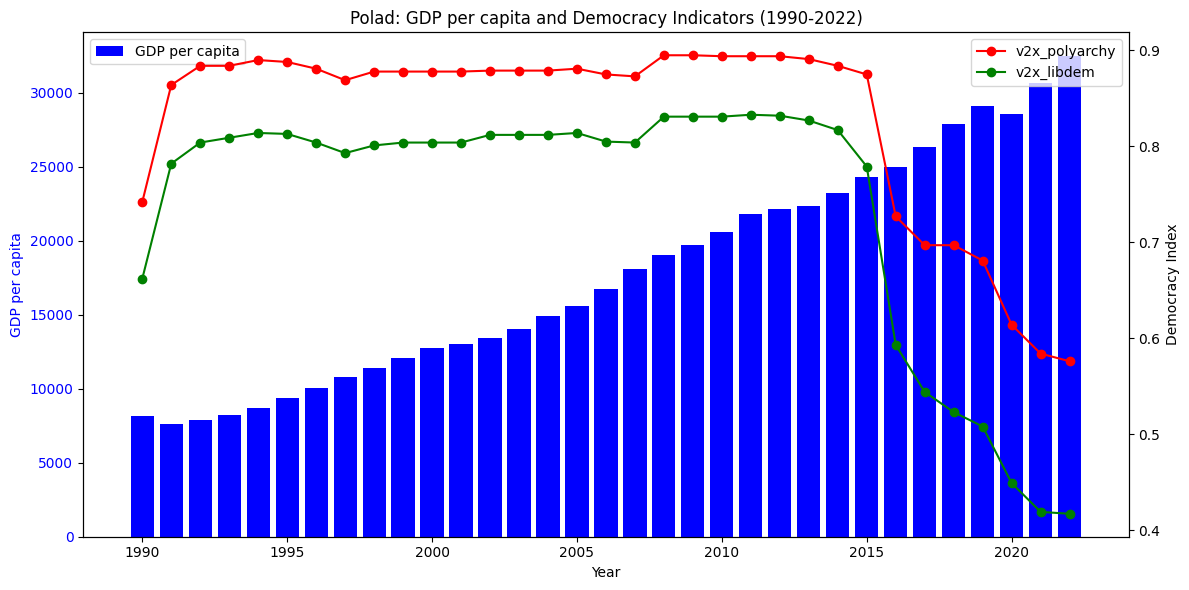

In [93]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

#gdppc
ax1.bar(poland_data['year'], poland_data['gdppc'], color='blue', label='GDP per capita')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#v2x_polyarchy and v2x_libdem
ax2 = ax1.twinx()
ax2.plot(poland_data['year'], poland_data['v2x_polyarchy'], color='red', label='v2x_polyarchy', marker='o')
ax2.plot(poland_data['year'], poland_data['v2x_libdem'], color='green', label='v2x_libdem', marker='o')
ax2.set_ylabel('Democracy Index', color='black')
ax2.tick_params(axis='y', labelcolor='black')

#legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('Polad: GDP per capita and Democracy Indicators (1990-2022)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show
plt.tight_layout()
plt.show()

## Democratic indexes has little to do with GDP growth. Nobody expected them to be related anyway.